In [ ]:
!pip install kaggle --upgrade
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d walterconway/covid-flu-cold-symptoms

  0% 0.00/210k [00:00<?, ?B/s]
100% 210k/210k [00:00<00:00, 42.1MB/s]


In [ ]:
!unzip /content/covid-flu-cold-symptoms.zip

Archive:  /content/covid-flu-cold-symptoms.zip
  inflating: large_data.csv          


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/large_data.csv')

In [ ]:
df['TYPE'].unique()

array(['ALLERGY', 'COLD', 'COVID', 'FLU'], dtype=object)

In [ ]:
df['TYPE'].value_counts()

FLU        25000
ALLERGY    16381
COVID       2048
COLD        1024
Name: TYPE, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


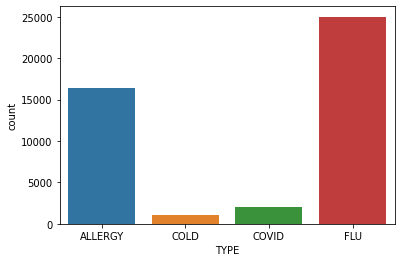

In [ ]:
sns.countplot(df['TYPE'])

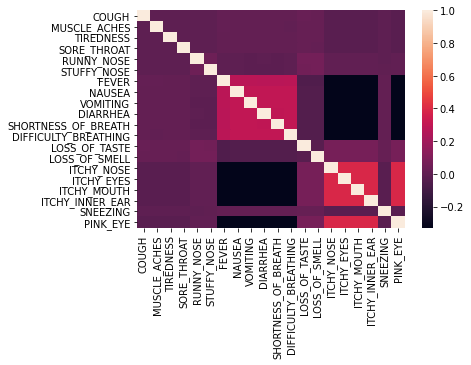

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df = pd.get_dummies(df, columns=['TYPE'])

In [ ]:
df.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE_ALLERGY,TYPE_COLD,TYPE_COVID,TYPE_FLU
0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,1,1,0,0,0
2,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0
3,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,0
4,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,1,1,1,0,0,0


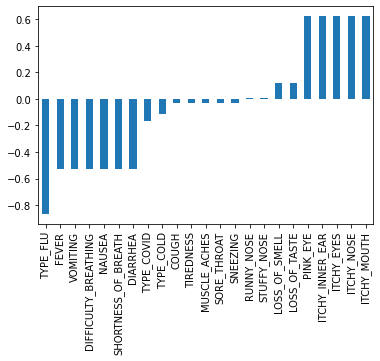

In [ ]:
df.corr()['TYPE_ALLERGY'].sort_values()[:-1].plot(kind='bar')

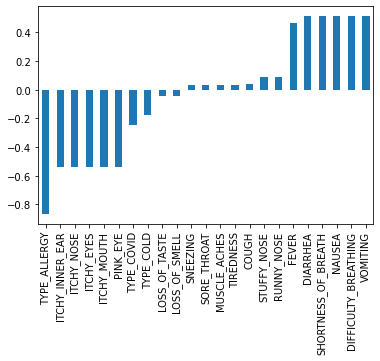

In [ ]:
df.corr()['TYPE_FLU'].sort_values()[:-1].plot(kind='bar')

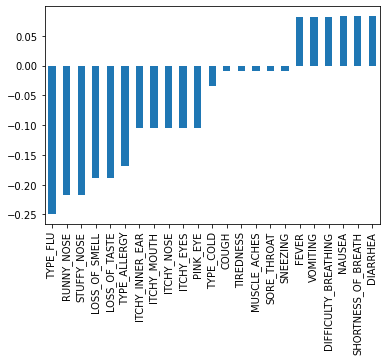

In [ ]:
df.corr()['TYPE_COVID'].sort_values()[:-1].plot(kind='bar')

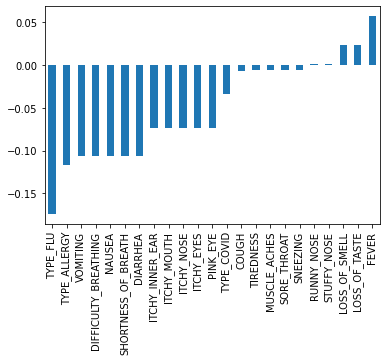

In [ ]:
df.corr()['TYPE_COLD'].sort_values()[:-1].plot(kind='bar')

In [ ]:
df = pd.get_dummies(df, columns=['TYPE'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns=['TYPE_ALLERGY','TYPE_FLU','TYPE_COLD','TYPE_COVID'], axis=1)

In [ ]:
y = df[['TYPE_ALLERGY','TYPE_FLU','TYPE_COLD','TYPE_COVID']]

In [ ]:
df.isnull().sum()

COUGH                   0
MUSCLE_ACHES            0
TIREDNESS               0
SORE_THROAT             0
RUNNY_NOSE              0
STUFFY_NOSE             0
FEVER                   0
NAUSEA                  0
VOMITING                0
DIARRHEA                0
SHORTNESS_OF_BREATH     0
DIFFICULTY_BREATHING    0
LOSS_OF_TASTE           0
LOSS_OF_SMELL           0
ITCHY_NOSE              0
ITCHY_EYES              0
ITCHY_MOUTH             0
ITCHY_INNER_EAR         0
SNEEZING                0
PINK_EYE                0
TYPE_ALLERGY            0
TYPE_COLD               0
TYPE_COVID              0
TYPE_FLU                0
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
model = Sequential()

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.10))

model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25)

In [ ]:
validation_data = (X_test, y_test)

In [ ]:
result = model.fit(X_train,y_train,validation_data=validation_data, epochs=350,callbacks=[early_stop], verbose=1)

Epoch 1/350
1042/1042 [==============================] - 3s 2ms/step - loss: 0.1813 - accuracy: 0.9185 - val_loss: 0.1054 - val_accuracy: 0.9322
Epoch 2/350
1042/1042 [==============================] - 2s 1ms/step - loss: 0.1122 - accuracy: 0.9314 - val_loss: 0.1054 - val_accuracy: 0.9317
Epoch 3/350
1042/1042 [==============================] - 2s 2ms/step - loss: 0.1093 - accuracy: 0.9317 - val_loss: 0.1025 - val_accuracy: 0.9305
Epoch 4/350
1042/1042 [==============================] - 2s 2ms/step - loss: 0.1076 - accuracy: 0.9304 - val_loss: 0.1015 - val_accuracy: 0.9318
Epoch 5/350
1042/1042 [==============================] - 2s 2ms/step - loss: 0.1059 - accuracy: 0.9328 - val_loss: 0.1032 - val_accuracy: 0.9300
Epoch 6/350
1042/1042 [==============================] - 2s 1ms/step - loss: 0.1058 - accuracy: 0.9334 - val_loss: 0.1012 - val_accuracy: 0.9314
Epoch 7/350
1042/1042 [==============================] - 2s 2ms/step - loss: 0.1047 - accuracy: 0.9329 - val_loss: 0.1021 - val_ac

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.181350,0.918504,0.105359,0.932248
1,0.112170,0.931372,0.105419,0.931708
2,0.109321,0.931672,0.102503,0.930538
3,0.107618,0.930442,0.101518,0.931798
4,0.105924,0.932811,0.103247,0.929998
5,0.105766,0.933381,0.101153,0.931438
6,0.104721,0.932931,0.102119,0.931078
7,0.104531,0.933021,0.100996,0.931798
8,0.105034,0.931042,0.100700,0.930898
9,0.104176,0.931912,0.101393,0.931168


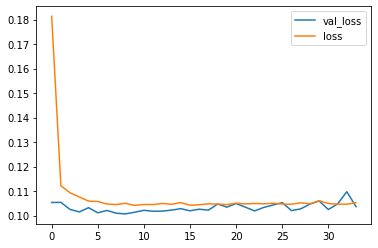

In [ ]:
losses[['val_loss','loss']].plot()

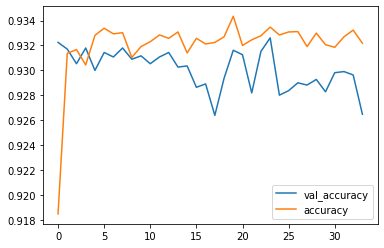

In [ ]:
losses[['val_accuracy','accuracy']].plot()

In [ ]:
preds = model.predict(X_test)

In [ ]:
predictions = np.argmax(preds, axis=1)

In [ ]:
predictions_df = pd.Series(predictions)

In [ ]:
predictions_df = pd.DataFrame(predictions_df)

In [ ]:
predictions_df = pd.get_dummies(predictions_df, columns=[0])

In [ ]:
predictions_df

,0_0,0_1,0_2,0_3
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
11109,0,1,0,0
11110,1,0,0,0
11111,0,0,0,1
11112,0,1,0,0


In [ ]:
predictions_df.shape

(11114, 4)

In [ ]:
y_test.shape

(11114, 4)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_test

,TYPE_ALLERGY,TYPE_FLU,TYPE_COLD,TYPE_COVID
20482,0,1,0,0
41460,0,1,0,0
42984,0,1,0,0
20258,0,1,0,0
29117,0,1,0,0
...,...,...,...,...
39171,0,1,0,0
10383,1,0,0,0
18239,0,0,0,1
28025,0,1,0,0


In [ ]:
preds = model.predict(X_test)

In [ ]:
predictions = np.argmax(preds, axis=1)

In [ ]:
predictions_df = pd.Series(predictions)

In [ ]:
predictions_df = pd.DataFrame(predictions_df)

In [ ]:
predictions_df = pd.get_dummies(predictions_df, columns=[0])

In [ ]:
print(classification_report(y_test,predictions_df))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4141
           1       0.95      0.94      0.95      6239
           2       0.49      0.66      0.56       243
           3       0.43      0.43      0.43       491

   micro avg       0.93      0.93      0.93     11114
   macro avg       0.71      0.75      0.73     11114
weighted avg       0.93      0.93      0.93     11114
 samples avg       0.93      0.93      0.93     11114



In [ ]:
# After Resampling

In [ ]:
df = pd.read_csv('/content/large_data.csv')

In [ ]:
df.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,1,1,ALLERGY


In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['TYPE']= label_encoder.fit_transform(df['TYPE'])

df['TYPE'].unique()


array([0, 1, 2, 3])

In [ ]:
df = df.sample(frac=1)

In [ ]:
X = df.drop('TYPE',axis=1)
y = df['TYPE']

In [ ]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
Sm = SMOTE()

In [ ]:
X,y = Sm.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from collections import Counter

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [ ]:
#X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc, roc_curve

In [ ]:
def metrics(target,preds):
  fpr,tpr,thresholds = roc_curve(target,preds)
  return auc(target,preds)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier(n_estimators=1000)
model_Rf = Rf.fit(X_train,y_train)
preds = model.predict(X_test)

In [ ]:
preds

array([[0.2577821 , 0.20904966, 0.29398665, 0.23918161],
       [0.19361126, 0.25603855, 0.27290192, 0.2774483 ],
       [0.16668308, 0.25248906, 0.27693498, 0.30389285],
       ...,
       [0.25071055, 0.18705876, 0.31171954, 0.25051126],
       [0.17073856, 0.24707717, 0.26878896, 0.31339532],
       [0.19077578, 0.23759127, 0.2755507 , 0.29608223]], dtype=float32)

In [ ]:
preds = np.argmax(preds, axis=1)

In [ ]:
preds

array([2, 3, 3, ..., 2, 3, 3])

In [ ]:
y_test

array([3, 1, 1, ..., 3, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.11      0.01      0.02      6250
           1       0.14      0.01      0.02      6250
           2       0.35      0.83      0.49      6250
           3       0.12      0.17      0.14      6250

    accuracy                           0.26     25000
   macro avg       0.18      0.26      0.17     25000
weighted avg       0.18      0.26      0.17     25000



In [ ]:
y_test = pd.DataFrame(y_test)

In [ ]:
y_test = pd.get_dummies(y_test, columns=[0])

In [ ]:
y_train = pd.DataFrame(y_train)

In [ ]:
y_train = pd.get_dummies(y_train, columns=[0])

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from sklearn.keras.layers import Dense, Dropout

In [ ]:
model = Sequential()

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.10))

model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25)

In [ ]:
validation_data = (X_test,y_test)

In [ ]:
result = model.fit(X_train,y_train,validation_data=validation_data, epochs=25,callbacks=[early_stop], verbose=1)

Epoch 1/25
2344/2344 [==============================] - 4s 2ms/step - loss: 0.2118 - accuracy: 0.9370 - val_loss: 0.1636 - val_accuracy: 0.9524
Epoch 2/25
2344/2344 [==============================] - 4s 2ms/step - loss: 0.1621 - accuracy: 0.9511 - val_loss: 0.1551 - val_accuracy: 0.9512
Epoch 3/25
2344/2344 [==============================] - 4s 2ms/step - loss: 0.1595 - accuracy: 0.9510 - val_loss: 0.1647 - val_accuracy: 0.9524
Epoch 4/25
2344/2344 [==============================] - 4s 2ms/step - loss: 0.1605 - accuracy: 0.9513 - val_loss: 0.1572 - val_accuracy: 0.9524
Epoch 5/25
2344/2344 [==============================] - 4s 2ms/step - loss: 0.1595 - accuracy: 0.9518 - val_loss: 0.1561 - val_accuracy: 0.9524
Epoch 6/25
2344/2344 [==============================] - 4s 2ms/step - loss: 0.1600 - accuracy: 0.9519 - val_loss: 0.1569 - val_accuracy: 0.9524
Epoch 7/25
2344/2344 [==============================] - 4s 2ms/step - loss: 0.1599 - accuracy: 0.9518 - val_loss: 0.1593 - val_accuracy:

In [ ]:
losses = pd.DataFrame(model.history.history)

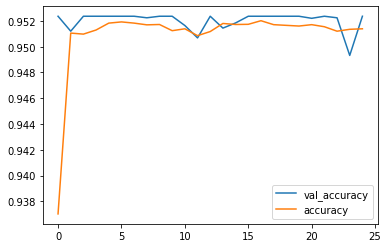

In [ ]:
losses[['val_accuracy','accuracy']].plot()

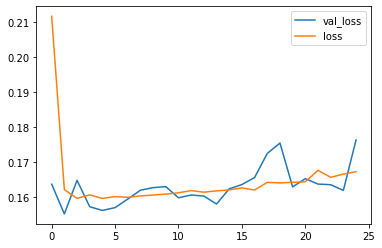

In [ ]:
losses[['val_loss','loss']].plot()

In [ ]:
X_test.shape

(25000, 20)

In [ ]:
X_train.shape

(75000, 20)

In [ ]:
preds = model.predict(X_test)

In [ ]:
preds.shape

(25000, 4)

In [ ]:
y_test.shape

(25000, 4)

In [ ]:
y_test

,0_0,0_1,0_2,0_3
0,0,0,0,1
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
24995,0,1,0,0
24996,0,0,0,1
24997,0,0,0,1
24998,1,0,0,0


In [ ]:
preds = model.predict(X_test)

In [ ]:
predictions_df = np.argmax(preds, axis=1)

In [ ]:
predictions_df = pd.DataFrame(predictions_df)

In [ ]:
predictions_df = pd.get_dummies(predictions_df, columns=[0])

In [ ]:
print(classification_report(y_test,predictions_df))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      6250
           1       0.90      1.00      0.95      6250
           2       0.93      0.94      0.94      6250
           3       1.00      0.91      0.95      6250

   micro avg       0.95      0.95      0.95     25000
   macro avg       0.96      0.95      0.95     25000
weighted avg       0.96      0.95      0.95     25000
 samples avg       0.95      0.95      0.95     25000



In [ ]:
model.save('FLU_ALLERGY_COVID_COLD.h5')